In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)
m

545

In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes' : 1, "no" : 0})          
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = np.random)
df_train.shape

(381, 13)

In [9]:
df_test.shape

(164, 13)

In [10]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [11]:
df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [12]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [13]:
def GD(theta, alpha, num_iter, h, X, y, n):
    cost = np.ones(num_iter)
    for i in range(0,num_iter):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [14]:
def linear_regression(X, y, alpha, num_iter):
    n = X.shape[1]
    column = np.ones((X.shape[0],1))
    X = np.concatenate((column, X), axis = 1)
    theta = np.zeros(n+1)
    h = hypothesis(theta, X, n)
    theta, cost = GD(theta,alpha,num_iter,h,X,y,n)
    return theta, cost

In [15]:
X_t = df_Newtrain.values[:,[0,1,2,3,4]]
Y_t = df_Newtrain.values[:,5]
X_v = df_Newtest.values[:,[0,1,2,3,4]]
Y_v = df_Newtest.values[:,5]

In [16]:
mean = np.ones(X_t.shape[1])
std = np.ones(X_t.shape[1])
for i in range(0, X_t.shape[1]):
    mean[i] = np.mean(X_t.transpose()[i])
    std[i] = np.std(X_t.transpose()[i])
    for j in range(0, X_t.shape[0]):
        X_t[j][i] = (X_t[j][i] - mean[i])/std[i]
mean = np.ones(X_v.shape[1])
std = np.ones(X_v.shape[1])
for i in range(0, X_v.shape[1]):
    mean[i] = np.mean(X_v.transpose()[i])
    std[i] = np.std(X_v.transpose()[i])
    for j in range(0, X_v.shape[0]):
        X_v[j][i] = (X_v[j][i] - mean[i])/std[i] 

In [17]:
df_Newtrain.shape

(381, 6)

Text(0.5, 1.0, 'Gradient Descent Convergence')

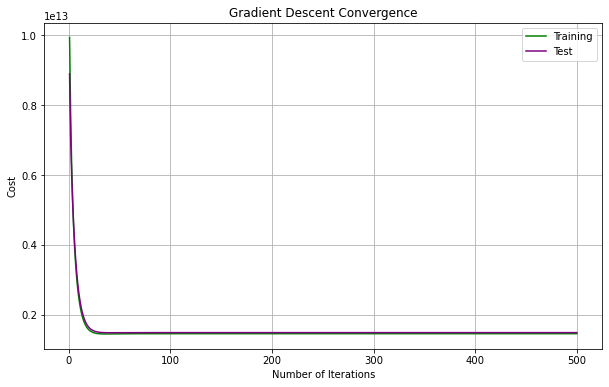

In [90]:
theta, cost = linear_regression(X_t, Y_t, 0.1, 500)
cost = list(cost)
theta2, cost2 = linear_regression(X_v, Y_v, 0.1, 500)
cost2 = list(cost2)

n_iterations = [x for x in range(1,501)]
n_iterations2 = [x for x in range(1,501)]

plt.plot(n_iterations, cost, color = 'green', label = 'Training')
plt.plot(n_iterations2, cost2, color = 'purple', label = 'Test')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')

In [19]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,1,0,0,0,1,0,0,3143000
392,3990,3,1,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,0,0,1,0,0,0,0,4340000
250,3510,3,1,1,0,0,0,0,0,0,4515000


In [20]:
df_Newtest.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,4000,3,1,1,0,0,0,0,1,0,4585000
113,9620,3,1,1,0,1,0,0,2,1,6083000
325,3460,4,1,1,0,0,0,1,0,0,4007500
66,13200,2,1,1,0,1,1,0,1,0,6930000
479,3660,4,1,0,0,0,0,0,0,0,2940000


In [21]:
X_v = df_Newtest.values[:,0:10]
Y_v = df_Newtest.values[:,10]

In [22]:
mean = np.ones(X_t.shape[1])
std = np.ones(X_t.shape[1])
for i in range(0, X_t.shape[1]):
    mean[i] = np.mean(X_t.transpose()[i])
    std[i] = np.std(X_t.transpose()[i])
    for j in range(0, X_t.shape[0]):
        X_t[j][i] = (X_t[j][i] - mean[i])/std[i]
mean = np.ones(X_v.shape[1])
std = np.ones(X_v.shape[1])
for i in range(0, X_v.shape[1]):
    mean[i] = np.mean(X_v.transpose()[i])
    std[i] = np.std(X_v.transpose()[i])
    for j in range(0, X_v.shape[0]):
        X_v[j][i] = (X_v[j][i] - mean[i])/std[i]

Text(0.5, 1.0, 'Gradient Descent Convergence')

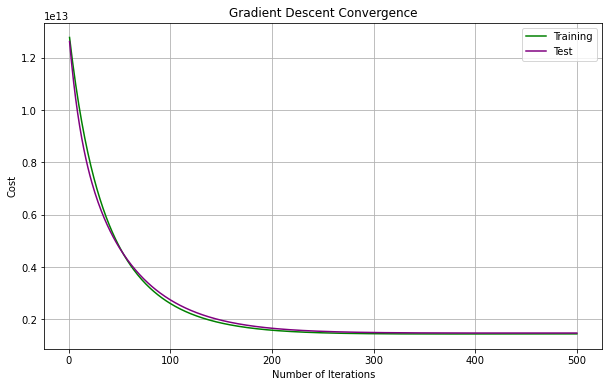

In [92]:
theta, cost = linear_regression(X_t, Y_t, 0.01, 500)
cost = list(cost)
theta2, cost2 = linear_regression(X_v, Y_v, 0.01, 500)
cost2 = list(cost2)

n_iterations = [x for x in range(1,501)]
n_iterations2 = [x for x in range(1,501)]

plt.plot(n_iterations, cost, color = 'green', label = 'Training')
plt.plot(n_iterations2, cost2, color = 'purple', label = 'Test')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')

In [24]:
## Problem 2 ##

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = np.random)
df_train.shape

(381, 13)

In [26]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Normal = df_Newtrain
df_Standard = df_Newtrain
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Normal[num_vars] = scaler.fit_transform(df_Normal[num_vars])
df_Normal.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212


In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_Standard[num_vars] = scaler.fit_transform(df_Standard[num_vars])
df_Standard.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,-0.286366,0.073764,-0.581230,0.207401,-0.822960,-0.868394
392,-0.544762,0.073764,-0.581230,0.207401,-0.822960,-0.677628
231,-0.377564,0.073764,-0.581230,-0.937813,-0.822960,-0.041744
271,-1.601145,2.884176,-0.581230,0.207401,-0.822960,-0.228768
250,-0.787958,0.073764,-0.581230,1.352614,-0.822960,-0.135256
541,-1.350349,0.073764,-0.581230,-0.937813,-0.822960,-1.603589
461,-0.053303,-1.331442,-0.581230,-0.937813,-0.822960,-0.902058
124,0.739618,0.073764,1.488383,2.497828,0.321375,0.631546
154,-0.717026,0.073764,1.488383,0.207401,1.465710,0.407116
451,0.853616,-1.331442,-0.581230,-0.937813,-0.822960,-0.864653


In [29]:
Xn = df_Normal.values[:,[0,1,2,3,4]]
Yn = df_Normal.values[:,5]
Xtest = df_Newtest.values[:,[0,1,2,3,4]]
Ytest = df_Newtest.values[:,5]
Xs = df_Standard.values[:,[0,1,2,3,4]]
Ys = df_Standard.values[:,5]

In [30]:
mean = np.ones(Xn.shape[1])
std = np.ones(Xn.shape[1])
for i in range(0, Xn.shape[1]):
    mean[i] = np.mean(Xn.transpose()[i])
    std[i] = np.std(Xn.transpose()[i])
    for j in range(0, Xn.shape[0]):
        Xn[j][i] = (Xn[j][i] - mean[i])/std[i]

In [31]:
mean = np.ones(Xs.shape[1])
std = np.ones(Xs.shape[1])
for i in range(0, Xs.shape[1]):
    mean[i] = np.mean(Xs.transpose()[i])
    std[i] = np.std(Xs.transpose()[i])
    for j in range(0, Xs.shape[0]):
        Xs[j][i] = (Xs[j][i] - mean[i])/std[i]

In [32]:
mean = np.ones(Xtest.shape[1])
std = np.ones(Xtest.shape[1])
for i in range(0, Xtest.shape[1]):
    mean[i] = np.mean(Xtest.transpose()[i])
    std[i] = np.std(Xtest.transpose()[i])
    for j in range(0, Xtest.shape[0]):
        Xtest[j][i] = (Xtest[j][i] - mean[i])/std[i]

In [33]:
def compute_cost(X, n, theta):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [34]:
def gradient_descent(X, Y, theta, alpha, iterations, n, h):
    cost = np.ones(iterations)
    for i in range(0,iterations):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - Y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-Y) * X.transpose()[j])
        h = compute_cost(X, n, theta)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - Y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [35]:
def linear_regression(X, Y, alpha, iterations):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = compute_cost(X, n, theta)
    theta, cost = gradient_descent(X, Y, theta, alpha, iterations, n, h)
    return theta, cost

In [36]:
iterations = 500;

In [37]:
theta, cost = linear_regression(Xn, Yn, 0.1, iterations)
print('Final Theta Value with Normalization =', theta)
cost = list(cost)
n_iterations = [x for x in range(1,(iterations + 1))]

Final Theta Value with Normalization = [[1.24535844e-16 3.83653304e-01 1.04343457e-01 2.98541735e-01
  2.34542828e-01 1.49757135e-01]]


In [38]:
theta2, cost2 = linear_regression(Xs, Ys, 0.1, iterations)
print('Final Theta Value with Standardization =', theta2)
cost2 = list(cost2)
n_iterations2 = [x for x in range(1,(iterations + 1))]

Final Theta Value with Standardization = [[1.24535844e-16 3.83653304e-01 1.04343457e-01 2.98541735e-01
  2.34542828e-01 1.49757135e-01]]


In [39]:
theta_t, cost_t = linear_regression(Xtest, Ytest, 0.1, iterations)
print('Final Theta Value of the Test Set =', theta_t)
cost_t = list(cost_t)
n_iterations_t = [x for x in range(1,(iterations + 1))]

Final Theta Value of the Test Set = [[4009323.46427773  844638.61768703  225437.77741561  911745.77297157
   885446.81234427  751101.29064712]]


Text(0.5, 1.0, 'Convergence of the Gradient Descent')

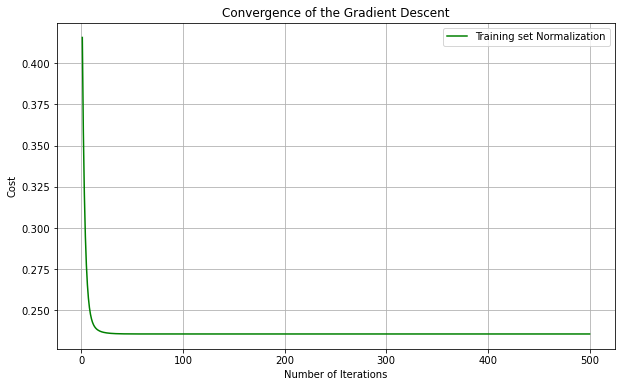

In [40]:
plt.plot(n_iterations, cost, color = 'green', label='Training set Normalization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

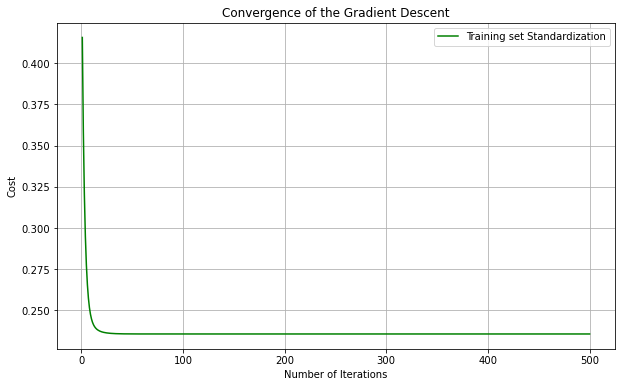

In [41]:
plt.plot(n_iterations2, cost2, color = 'green', label='Training set Standardization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

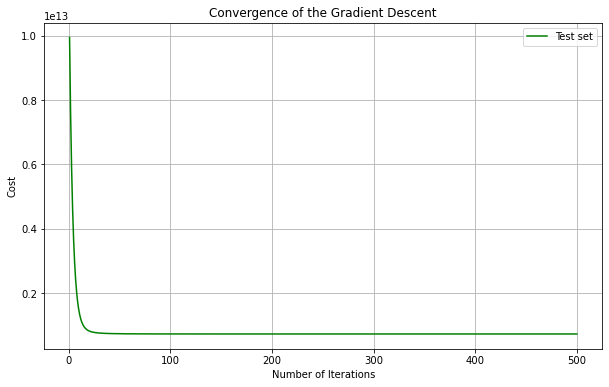

In [42]:
plt.plot(n_iterations_t, cost_t, color = 'green', label='Test set')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

In [43]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Normal = df_Newtrain
df_Standard = df_Newtrain
df_Newtrain.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,1,0,0,0,1,0,0,3143000
392,3990,3,1,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,0,0,1,0,0,0,0,4340000
250,3510,3,1,1,0,0,0,0,0,0,4515000


In [44]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Normal[num_vars] = scaler.fit_transform(df_Normal[num_vars])
df_Normal.head(20)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,0.193548,0.50,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.120606
392,0.156495,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.151515
231,0.180471,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.254545
271,0.005013,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.224242
250,0.121622,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.239394
541,0.040976,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001485
461,0.226969,0.25,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.115152
124,0.340671,0.50,0.5,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.363636
154,0.131793,0.50,0.5,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.327273
451,0.357018,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.121212


In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_Standard[num_vars] = scaler.fit_transform(df_Standard[num_vars])
df_Standard.head(20)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,-0.286366,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,1.422607,-0.822960,-0.564215,-0.868394
392,-0.544762,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-0.677628
231,-0.377564,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,1.772373,-0.041744
271,-1.601145,2.884176,-0.581230,-2.543735,-0.457738,1.405903,-0.216109,-0.702935,-0.822960,-0.564215,-0.228768
250,-0.787958,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-0.135256
541,-1.350349,0.073764,-0.581230,-2.543735,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-1.603589
461,-0.053303,-1.331442,-0.581230,0.393123,-0.457738,1.405903,-0.216109,1.422607,-0.822960,-0.564215,-0.902058
124,0.739618,0.073764,1.488383,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,0.321375,-0.564215,0.631546
154,-0.717026,0.073764,1.488383,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,1.465710,-0.564215,0.407116
451,0.853616,-1.331442,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-0.864653


In [46]:
Xn = df_Normal.values[:,0:10]
Yn = df_Normal.values[:,10]
Xtest = df_Newtest.values[:,0:10]
Ytest = df_Newtest.values[:,10]
Xs = df_Standard.values[:,0:10]
Ys = df_Standard.values[:,10]

In [47]:
mean = np.ones(Xn.shape[1])
std = np.ones(Xn.shape[1])
for i in range(0, Xn.shape[1]):
    mean[i] = np.mean(Xn.transpose()[i])
    std[i] = np.std(Xn.transpose()[i])
    for j in range(0, Xn.shape[0]):
        Xn[j][i] = (Xn[j][i] - mean[i])/std[i]

In [48]:
mean = np.ones(Xs.shape[1])
std = np.ones(Xs.shape[1])
for i in range(0, Xs.shape[1]):
    mean[i] = np.mean(Xs.transpose()[i])
    std[i] = np.std(Xs.transpose()[i])
    for j in range(0, Xs.shape[0]):
        Xs[j][i] = (Xs[j][i] - mean[i])/std[i]

In [49]:
mean = np.ones(Xtest.shape[1])
std = np.ones(Xtest.shape[1])
for i in range(0, Xtest.shape[1]):
    mean[i] = np.mean(Xtest.transpose()[i])
    std[i] = np.std(Xtest.transpose()[i])
    for j in range(0, Xtest.shape[0]):
        Xtest[j][i] = (Xtest[j][i] - mean[i])/std[i]

In [50]:
theta, cost = linear_regression(Xn, Yn, 0.1, iterations)
print('Final Theta Value with Normalization =', theta)
cost = list(cost)
n_iterations = [x for x in range(1,(iterations + 1))]

Final Theta Value with Normalization = [[1.24885520e-16 2.64108625e-01 1.27168543e-01 2.88652311e-01
  1.21315783e-01 9.99334571e-02 3.90689188e-02 1.43965719e-01
  2.70513007e-01 9.08846334e-02 1.67876986e-01]]


In [51]:
theta2, cost2 = linear_regression(Xs, Ys, 0.1, iterations)
print('Final Theta Value with Standardization =', theta2)
cost2 = list(cost2)
n_iterations2 = [x for x in range(1,(iterations + 1))]

Final Theta Value with Standardization = [[1.24885520e-16 2.64108625e-01 1.27168543e-01 2.88652311e-01
  1.21315783e-01 9.99334571e-02 3.90689188e-02 1.43965719e-01
  2.70513007e-01 9.08846334e-02 1.67876986e-01]]


In [52]:
theta_t, cost_t = linear_regression(Xtest, Ytest, 0.1, iterations)
print('Final Theta Value of the Test Set =', theta_t)
cost_t = list(cost_t)
n_iterations_t = [x for x in range(1,(iterations + 1))]

Final Theta Value of the Test Set = [[3665283.80998753  741402.85068115  264657.01674763  992948.00356364
   305680.32344454  126509.594599    265573.12956302   96887.61766261
  1318395.63714537  574221.3020385   498783.75949985]]


Text(0.5, 1.0, 'Convergence of the Gradient Descent')

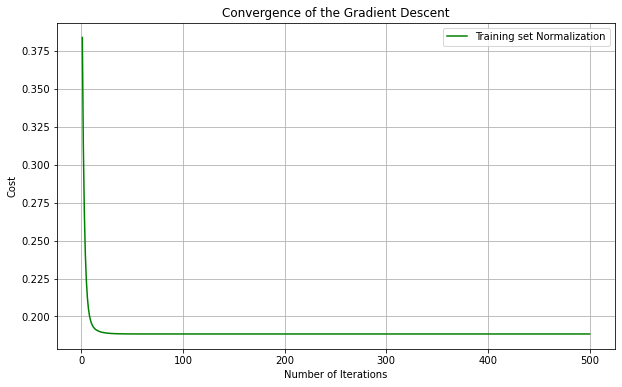

In [53]:
plt.plot(n_iterations, cost, color = 'green', label='Training set Normalization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

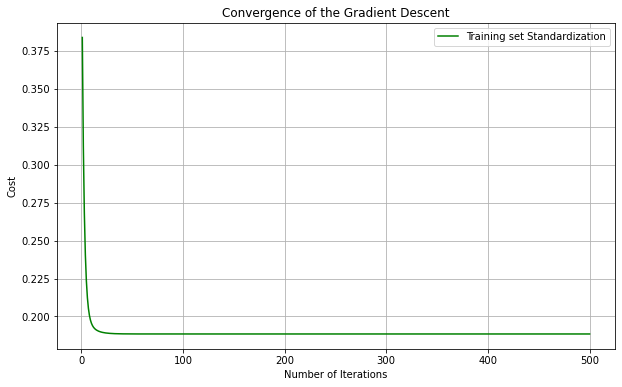

In [54]:
plt.plot(n_iterations2, cost2, color = 'green', label='Training set Standardization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

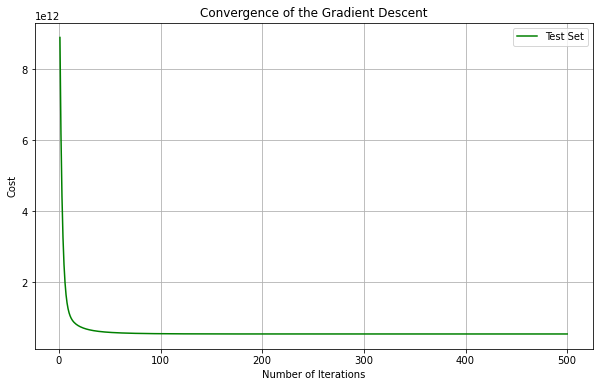

In [55]:
plt.plot(n_iterations_t, cost_t, color = 'green', label='Test Set')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

In [56]:
## Problem 3 ##

In [57]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = np.random)
df_train.shape

(381, 13)

In [58]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Normal = df_Newtrain
df_Standard = df_Newtrain
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [59]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Normal[num_vars] = scaler.fit_transform(df_Normal[num_vars])
df_Normal.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212


In [60]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_Standard[num_vars] = scaler.fit_transform(df_Standard[num_vars])
df_Standard.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,-0.286366,0.073764,-0.581230,0.207401,-0.822960,-0.868394
392,-0.544762,0.073764,-0.581230,0.207401,-0.822960,-0.677628
231,-0.377564,0.073764,-0.581230,-0.937813,-0.822960,-0.041744
271,-1.601145,2.884176,-0.581230,0.207401,-0.822960,-0.228768
250,-0.787958,0.073764,-0.581230,1.352614,-0.822960,-0.135256
541,-1.350349,0.073764,-0.581230,-0.937813,-0.822960,-1.603589
461,-0.053303,-1.331442,-0.581230,-0.937813,-0.822960,-0.902058
124,0.739618,0.073764,1.488383,2.497828,0.321375,0.631546
154,-0.717026,0.073764,1.488383,0.207401,1.465710,0.407116
451,0.853616,-1.331442,-0.581230,-0.937813,-0.822960,-0.864653


In [61]:
Xn = df_Normal.values[:,[0,1,2,3,4]]
Yn = df_Normal.values[:,5]
Xtest = df_Newtest.values[:,[0,1,2,3,4]]
Ytest = df_Newtest.values[:,5]
Xs = df_Standard.values[:,[0,1,2,3,4]]
Ys = df_Standard.values[:,5]

In [62]:
mean = np.ones(Xn.shape[1])
std = np.ones(Xn.shape[1])
for i in range(0, Xn.shape[1]):
    mean[i] = np.mean(Xn.transpose()[i])
    std[i] = np.std(Xn.transpose()[i])
    for j in range(0, Xn.shape[0]):
        Xn[j][i] = (Xn[j][i] - mean[i])/std[i]

In [63]:
mean = np.ones(Xs.shape[1])
std = np.ones(Xs.shape[1])
for i in range(0, Xs.shape[1]):
    mean[i] = np.mean(Xs.transpose()[i])
    std[i] = np.std(Xs.transpose()[i])
    for j in range(0, Xs.shape[0]):
        Xs[j][i] = (Xs[j][i] - mean[i])/std[i]

In [64]:
mean = np.ones(Xtest.shape[1])
std = np.ones(Xtest.shape[1])
for i in range(0, Xtest.shape[1]):
    mean[i] = np.mean(Xtest.transpose()[i])
    std[i] = np.std(Xtest.transpose()[i])
    for j in range(0, Xtest.shape[0]):
        Xtest[j][i] = (Xtest[j][i] - mean[i])/std[i]

In [65]:
def compute_cost(X, n, theta):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [66]:
def gradient_descent(X, Y, theta, alpha, iterations, n, h):
    lam = 1000
    cost = np.ones(iterations)
    for i in range(0,iterations):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - Y)
        for j in range(1,n+1):
            theta[j] = (theta[j]*(1-(alpha*(lam/X.shape[0])))) - (alpha/X.shape[0]) * sum((h-Y) * X.transpose()[j])
        h = compute_cost(X, n, theta)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - Y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [67]:
def linear_regression(X, Y, alpha, iterations):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = compute_cost(X, n, theta)
    theta, cost = gradient_descent(X, Y, theta, alpha, iterations, n, h)
    return theta, cost

In [68]:
iterations = 500;

In [69]:
theta, cost = linear_regression(Xn, Yn, 0.1, iterations)
print('Final Theta Value with Normalization =', theta)
cost = list(cost)
n_iterations = [x for x in range(1,(iterations + 1))]

Final Theta Value with Normalization = [[1.42056096e-16 1.24270894e-01 7.53179957e-02 1.10985844e-01
  9.01203112e-02 7.75127501e-02]]


In [70]:
theta2, cost2 = linear_regression(Xs, Ys, 0.1, iterations)
print('Final Theta Value with Standardization =', theta2)
cost = list(cost2)
n_iterations2 = [x for x in range(1,(iterations + 1))]

Final Theta Value with Standardization = [[1.42056096e-16 1.24270894e-01 7.53179957e-02 1.10985844e-01
  9.01203112e-02 7.75127501e-02]]


In [71]:
theta_t, cost_t = linear_regression(Xtest, Ytest, 0.1, iterations)
print('Final Theta Value of the Test Set =', theta)
cost_t = list(cost_t)
n_iterations_t = [x for x in range(1,(iterations + 1))]

Final Theta Value of the Test Set = [[1.42056096e-16 1.24270894e-01 7.53179957e-02 1.10985844e-01
  9.01203112e-02 7.75127501e-02]]


Text(0.5, 1.0, 'Convergence of the Gradient Descent')

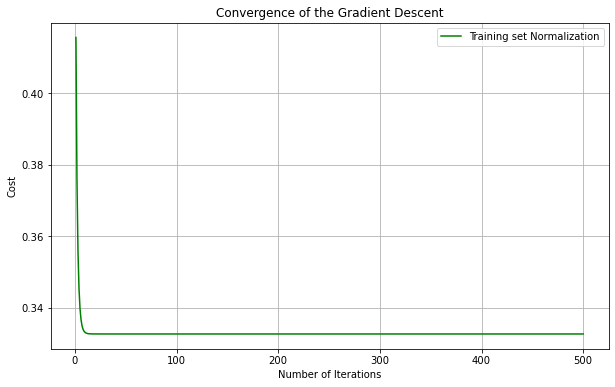

In [72]:
plt.plot(n_iterations, cost, color = 'green', label='Training set Normalization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

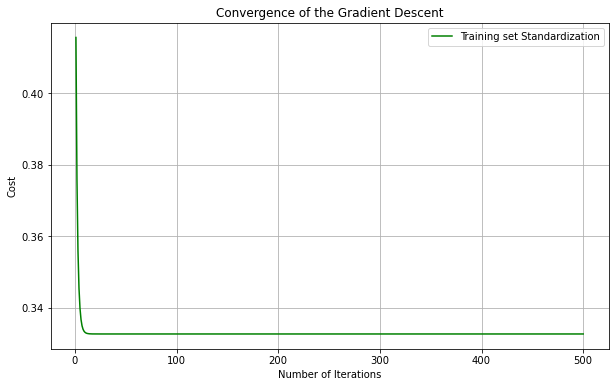

In [73]:
plt.plot(n_iterations2, cost2, color = 'green', label='Training set Standardization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

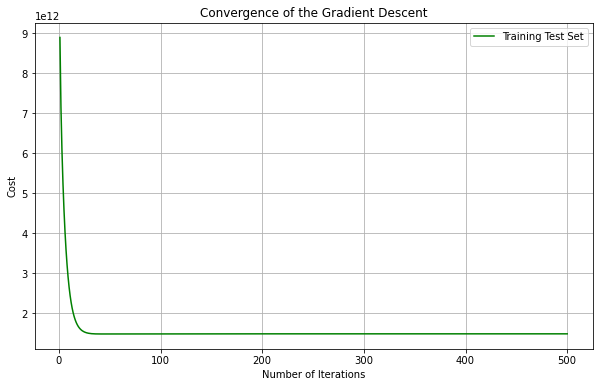

In [94]:
plt.plot(n_iterations_t, cost_t, color = 'green', label='Training Test Set')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

In [75]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Normal = df_Newtrain
df_Standard = df_Newtrain
df_Newtrain.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,1,0,0,0,1,0,0,3143000
392,3990,3,1,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,0,0,1,0,0,0,0,4340000
250,3510,3,1,1,0,0,0,0,0,0,4515000


In [76]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Normal[num_vars] = scaler.fit_transform(df_Normal[num_vars])
df_Normal.head(20)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,0.193548,0.50,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.120606
392,0.156495,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.151515
231,0.180471,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.254545
271,0.005013,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.224242
250,0.121622,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.239394
541,0.040976,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001485
461,0.226969,0.25,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.115152
124,0.340671,0.50,0.5,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.363636
154,0.131793,0.50,0.5,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.327273
451,0.357018,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.121212


In [77]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_Standard[num_vars] = scaler.fit_transform(df_Standard[num_vars])
df_Standard.head(20)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,-0.286366,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,1.422607,-0.822960,-0.564215,-0.868394
392,-0.544762,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-0.677628
231,-0.377564,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,1.772373,-0.041744
271,-1.601145,2.884176,-0.581230,-2.543735,-0.457738,1.405903,-0.216109,-0.702935,-0.822960,-0.564215,-0.228768
250,-0.787958,0.073764,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-0.135256
541,-1.350349,0.073764,-0.581230,-2.543735,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-1.603589
461,-0.053303,-1.331442,-0.581230,0.393123,-0.457738,1.405903,-0.216109,1.422607,-0.822960,-0.564215,-0.902058
124,0.739618,0.073764,1.488383,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,0.321375,-0.564215,0.631546
154,-0.717026,0.073764,1.488383,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,1.465710,-0.564215,0.407116
451,0.853616,-1.331442,-0.581230,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.822960,-0.564215,-0.864653


In [78]:
Xn = df_Normal.values[:,0:10]
Yn = df_Normal.values[:,10]
Xtest = df_Newtest.values[:,0:10]
Ytest = df_Newtest.values[:,10]
Xs = df_Standard.values[:,0:10]
Ys = df_Standard.values[:,10]

In [79]:
mean = np.ones(Xn.shape[1])
std = np.ones(Xn.shape[1])
for i in range(0, Xn.shape[1]):
    mean[i] = np.mean(Xn.transpose()[i])
    std[i] = np.std(Xn.transpose()[i])
    for j in range(0, Xn.shape[0]):
        Xn[j][i] = (Xn[j][i] - mean[i])/std[i]

In [80]:
mean = np.ones(Xs.shape[1])
std = np.ones(Xs.shape[1])
for i in range(0, Xs.shape[1]):
    mean[i] = np.mean(Xs.transpose()[i])
    std[i] = np.std(Xs.transpose()[i])
    for j in range(0, Xs.shape[0]):
        Xs[j][i] = (Xs[j][i] - mean[i])/std[i]

In [81]:
mean = np.ones(Xtest.shape[1])
std = np.ones(Xtest.shape[1])
for i in range(0, Xtest.shape[1]):
    mean[i] = np.mean(Xtest.transpose()[i])
    std[i] = np.std(Xtest.transpose()[i])
    for j in range(0, Xtest.shape[0]):
        Xtest[j][i] = (Xtest[j][i] - mean[i])/std[i]

In [82]:
theta, cost = linear_regression(Xn, Yn, 0.1, iterations)
print('Final Theta Value with Normalization =', theta)
cost = list(cost)
n_iterations = [x for x in range(1,(iterations + 1))]

Final Theta Value with Normalization = [[1.38369922e-16 1.08337017e-01 7.58521283e-02 1.08013107e-01
  5.54076634e-02 5.32500668e-02 3.66508358e-02 3.65154719e-02
  9.68953820e-02 6.81505402e-02 7.57869446e-02]]


In [83]:
theta2, cost2 = linear_regression(Xs, Ys, 0.1, iterations)
print('Final Theta Value with Standardization =', theta2)
cost2 = list(cost2)
n_iterations2 = [x for x in range(1,(iterations + 1))]

Final Theta Value with Standardization = [[1.38369922e-16 1.08337017e-01 7.58521283e-02 1.08013107e-01
  5.54076634e-02 5.32500668e-02 3.66508358e-02 3.65154719e-02
  9.68953820e-02 6.81505402e-02 7.57869446e-02]]


In [84]:
theta_t, cost_t = linear_regression(Xtest, Ytest, 0.1, iterations)
print('Final Theta Value of the Test Set =', theta_t)
cost_t = list(cost_t)
n_iterations_t = [x for x in range(1,(iterations + 1))]

Final Theta Value of the Test Set = [[4.68135283e+06 9.14174376e+04 7.10541172e+04 1.03091554e+05
  6.81362933e+04 4.24713613e+04 1.63927974e+04 8.78780977e+02
  6.38058529e+04 5.14196389e+04 2.74614616e+04]]


Text(0.5, 1.0, 'Convergence of the Gradient Descent')

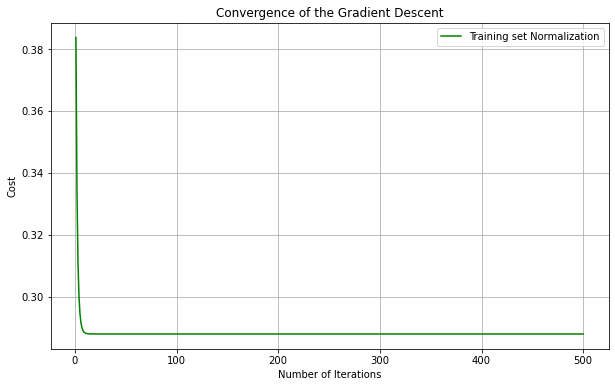

In [85]:
plt.plot(n_iterations, cost, color = 'green', label='Training set Normalization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

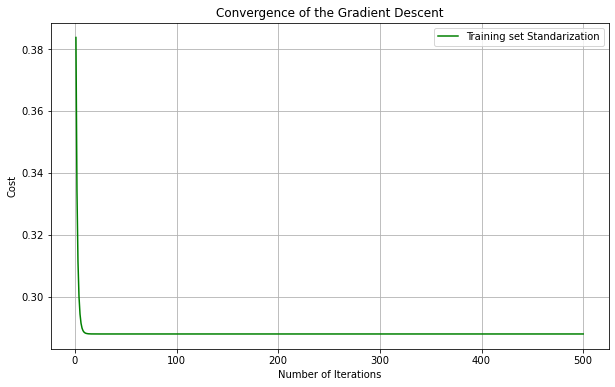

In [86]:
plt.plot(n_iterations2, cost2, color = 'green', label='Training set Standarization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')

Text(0.5, 1.0, 'Convergence of the Gradient Descent')

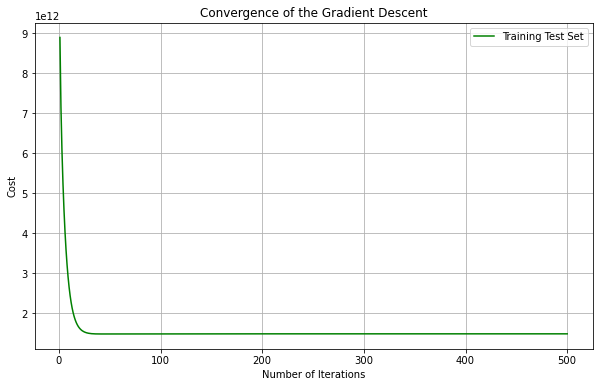

In [93]:
plt.plot(n_iterations_t, cost_t, color = 'green', label='Training Test Set')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')